In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# **Ler os resultados do ChatGPT**

In [2]:
url = 'https://docs.google.com/spreadsheets/d/1PeNy4tpVWd_C8rEgvXsylqt7WXZQOAUr/edit?usp=sharing&ouid=114011919931967309237&rtpof=true&sd=true'
file_id = url.split('/')[-2]
read_url='https://drive.google.com/uc?id=' + file_id

In [3]:
dados = pd.read_excel(read_url)
dados

,tweet,class,target_real,target_pred
0,the reason shelby hates sandwiches is because ...,0,contém discurso de ódio,0
1,antoniofrench the youre going have kill crack...,0,contém discurso de ódio,0
2,everyone calls me b they be like oh wassup b ...,0,contém discurso de ódio,0
3,hey go look at that video of the man that foun...,0,contém discurso de ódio,0
4,next time u gone call a darky a niccacall dat ...,0,contém discurso de ódio,0
...,...,...,...,...
145,yanks choked too lost strait remember,2,não contém discurso de ódio nem linguagem ofen...,2
146,just stopped by the line up room bealack still...,2,não contém discurso de ódio nem linguagem ofen...,2
147,parodies of jihadi songs more effective than ...,2,não contém discurso de ódio nem linguagem ofen...,0
148,rt talkmaster people who would vote for charli...,2,não contém discurso de ódio nem linguagem ofen...,0


In [4]:
label_names = ['0 - hate speech', '1 - offensive language', '2 - neither']
label_names

['0 - hate speech', '1 - offensive language', '2 - neither']

In [5]:

'''
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, classifier, labels=None):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(5, 5))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Greens", values_format=".2f", ax=ax, colorbar=True)
  plt.title(classifier + " confusion matrix")
  plt.rcParams.update({'font.size': 16})
  plt.grid(False)
  plt.show()
  '''
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_preds, y_true, classifier, labels=None):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(5, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Greens", values_format=".2f", ax=ax, colorbar=True)
    plt.title(classifier + " confusion matrix")
    plt.rcParams.update({'font.size': 10})
    plt.grid(False)

    # Rotaciona os rótulos das classes previstas (eixo X)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    plt.show()

**Resultados do ChatGPT**

In [6]:
from sklearn.metrics import classification_report
print('classifiation report')
print(classification_report(dados['target_pred'].to_numpy(), dados['class'].to_numpy(), target_names=label_names))

classifiation report
                        precision    recall  f1-score   support

       0 - hate speech       0.90      0.50      0.64        90
1 - offensive language       0.42      0.54      0.47        39
           2 - neither       0.40      0.95      0.56        21

              accuracy                           0.57       150
             macro avg       0.57      0.66      0.56       150
          weighted avg       0.71      0.57      0.59       150



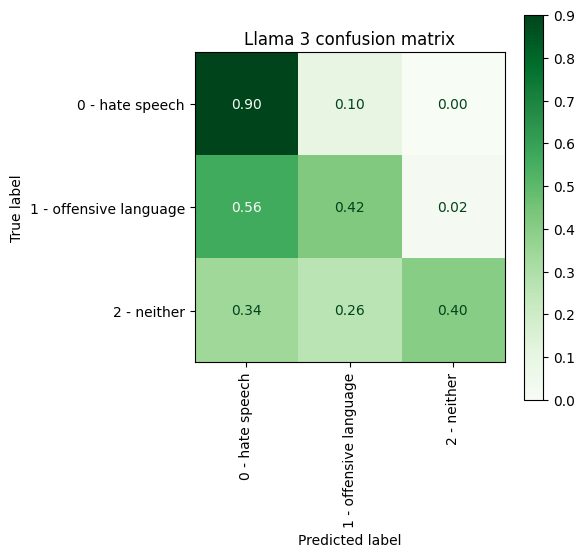

In [7]:
plot_confusion_matrix(dados['target_pred'].to_numpy(), dados['class'].to_numpy(), "Llama 3", labels=label_names)